# Predicting House Prices with Linear Regression - Task-3

# Import Required Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
# Load the dataset
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Basic information

In [32]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [33]:
data.shape

(545, 13)

In [34]:
data.info()
# shows column names, data types, and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [35]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [36]:
# checking missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [37]:
# checking for duplicates

duplicated_val = data.duplicated().sum()
print("Duplicated values are:",duplicated_val)

# no duplicates

Duplicated values are: 0


In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
# Step: Convert 'yes'/'no' categorical columns to numeric (1/0)

yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

# Replace 'yes' with 1 and 'no' with 0 in these columns
data[yes_no_cols] = data[yes_no_cols].replace({'yes': 1, 'no': 0})

# For 'furnishingstatus' column (categorical), map it manually
data['furnishingstatus'] = data['furnishingstatus'].map({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})

# Machine learning models work only with numeric data so that's why we convert them into numerical.

In [40]:
# Verify the changes
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


In [41]:
# STEP 8: final checks

print("\nData types now:\n", data.dtypes)


Data types now:
 price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [42]:
print("\nMissing values now:\n", data.isnull().sum())


Missing values now:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Exploratory Data Analysis (EDA)

**EDA helps us understand data patterns and relationships.**

In [43]:
print("\n Summary Statistics\n")
print(data.describe())


 Summary Statistics

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min 

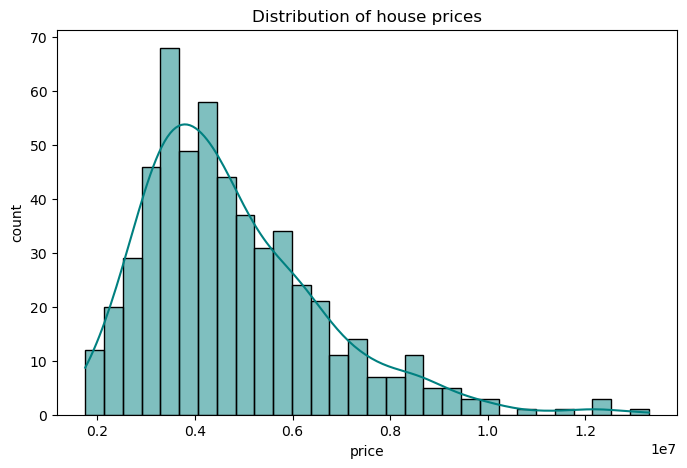

In [44]:
# Distribution of House Prices

plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=30, kde=True, color='teal')
plt.title('Distribution of house prices')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

# A histogram of prices shows how prices are distributed — skewed or normal.

"This histogram shows that most houses in our dataset fall in the middle price range, while very high-priced houses are rare.

The distribution is right-skewed, which means there are a few expensive outliers."

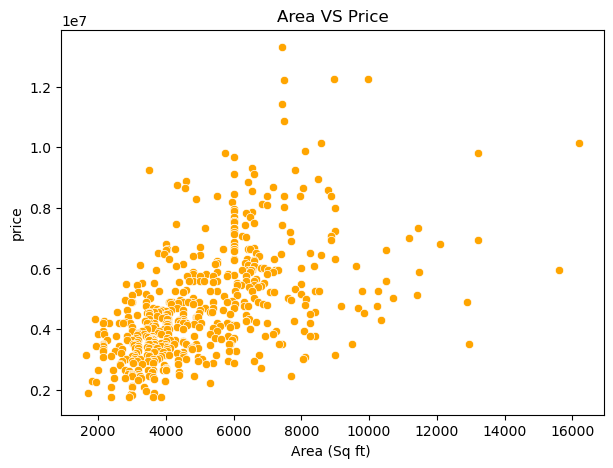

In [45]:
# Area VS Price

plt.figure(figsize=(7,5))
sns.scatterplot(x='area', y='price', data=data, color='orange')
plt.title("Area VS Price")
plt.xlabel('Area (Sq ft) ')
plt.ylabel('price')
plt.show()

# This scatter plot shows how house area affects price.
# Usually, larger area → higher price (positive correlation).
# Helps visually confirm relationships before modeling.

"From this scatter plot, we can conclude that area has a strong positive relationship with price — larger houses generally cost more, so area becomes a key factor in our prediction model."

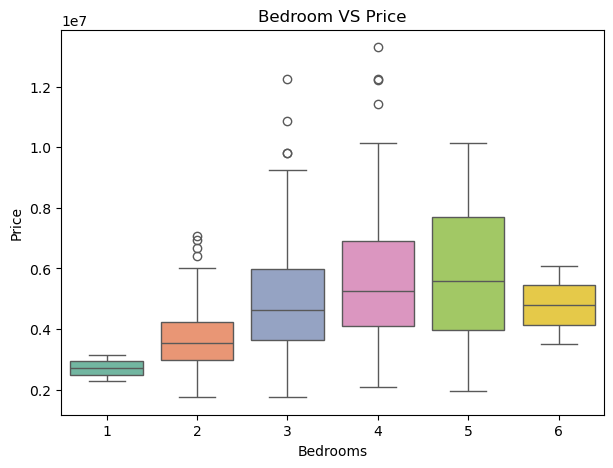

In [46]:
# Bedroom VS Price

plt.figure(figsize=(7,5))
sns.boxplot(x='bedrooms', y='price', data=data, palette='Set2')
plt.title('Bedroom VS Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

"This boxplot shows that houses with more bedrooms generally cost more, but there’s also a lot of variation — which means other features like location and area also impact the final price."

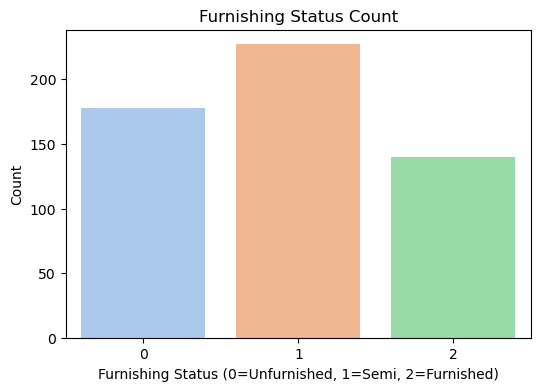

In [47]:
# Furnishing Status Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='furnishingstatus', data=data, palette='pastel')
plt.title('Furnishing Status Count')
plt.xlabel('Furnishing Status (0=Unfurnished, 1=Semi, 2=Furnished)')
plt.ylabel('Count')
plt.show()

"This graph shows that most houses are semi-furnished, followed by unfurnished ones.

Fully furnished houses are fewer, which reflects real market behavior where buyers prefer moderate furnishing levels."

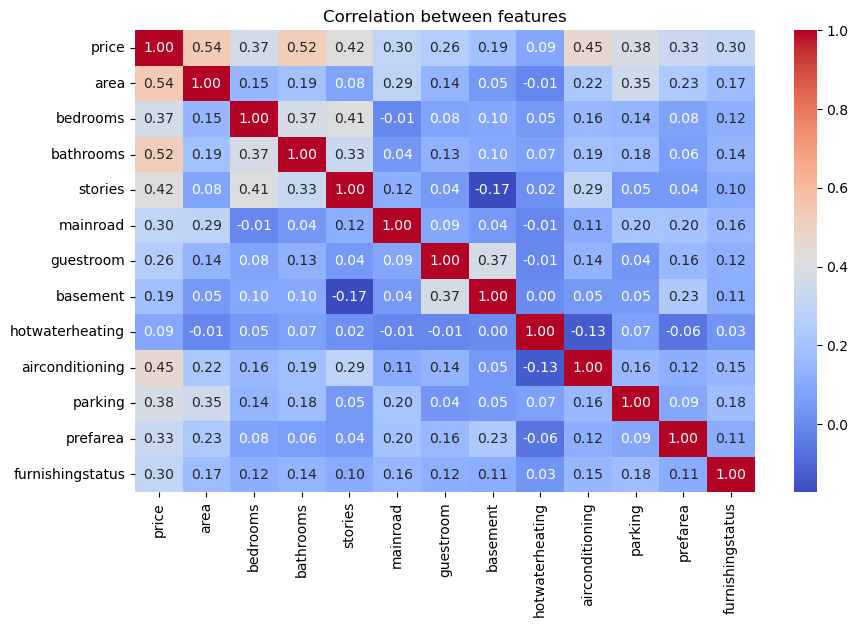

In [48]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between features")
plt.show()

# Correlation shows how strongly each feature is related to price.
# High positive correlation = strong impact on price.

"This correlation heatmap helps us understand which factors most affect house prices.

We can see that area, bathrooms, and air conditioning have the highest positive impact on price."

# Feature Selection

In [49]:
corr = data.corr()['price'].sort_values(ascending=False)
print("\nFeatures correlated with Price:\n", corr)


Features correlated with Price:
 price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64


# Prepare Data for Model Training

In [50]:
print(data.columns.tolist())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [51]:
# Drop the target column 'price' to create X, and keep it separately as y

X = data.drop(columns=['price'])
y = data['price']

# X contains all independent features (inputs).
# y is the dependent variable (output we want to predict).

In [52]:
# Split into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

print("Training and Testing sets created.")

# 80% of data is used for training, 20% for testing.
# random_state=42 ensures reproducibility.
# The model will learn from training data and be evaluated on test data.

Training and Testing sets created.


In [53]:
# train linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained.")

# The model learns the relationship between features (X) and price (y).
# Linear regression finds the “best-fit line” that minimizes prediction error.

Model trained.


In [54]:
# predict the model

y_pred = model.predict(X_test)

print("First 6 predictions:", y_pred[:6],"\n")

print("First 6 actual    :", y_test.values[:6])

First 6 predictions: [5203691.70963178 7257004.02115476 3062828.59668171 4559591.65374424
 3332932.30559782 3563080.67918997] 

First 6 actual    : [4060000 6650000 3710000 6440000 2800000 4900000]


# Model Evaluation

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:\n")
print(f"MSE  : {mse:.3f}")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2   : {r2:.4f}")

# MSE (Mean Squared Error): Average of squared prediction errors. Lower = better.
# MAE (Mean Absolute Error): Average of absolute prediction errors.
# RMSE (Root MSE): Easier to interpret because it’s in the same units as price.
# R² Score: Indicates how well model explains price variation (closer to 1 = better).

Linear Regression Model Evaluation:

MSE  : 1771751116594.034
MAE  : 979679.691
RMSE : 1331071.417
R2   : 0.6495


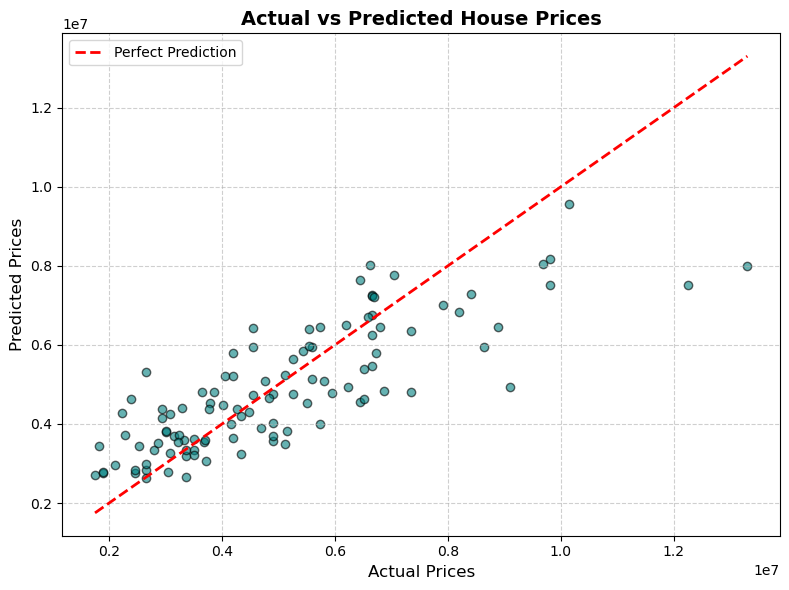

In [56]:
# Actual vs Predicted plot

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6, edgecolor='k')
mn = min(y_test.min(), y_pred.min()); mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual vs Predicted House Prices", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Each point represents one prediction.
# The closer points are to the red dashed line, the more accurate the predictions.
# Visually shows model performance — if points scatter widely, model may need improvement.

"This graph visually compares how close our model’s predictions are to real prices.

The clustering of points near the red line indicates that our Linear Regression model performs reasonably well for predicting house prices."

# Model coefficients

In [57]:
# coefficients

coeff_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
coeff_df = coeff_df.sort_values(by='coefficient', ascending=False).reset_index(drop=True)
print(coeff_df)

# Shows which features have more influence on price.
# A high positive coefficient = feature increases price.
# Negative coefficient = feature reduces price.

             feature   coefficient
0          bathrooms  1.097117e+06
1    airconditioning  7.855506e+05
2    hotwaterheating  6.878813e+05
3           prefarea  6.299017e+05
4            stories  4.062232e+05
5           basement  3.931598e+05
6           mainroad  3.668242e+05
7          guestroom  2.331468e+05
8            parking  2.257565e+05
9   furnishingstatus  2.103971e+05
10          bedrooms  7.857449e+04
11              area  2.358488e+02


# Saving cleaned data & coefficients

In [58]:
# Save cleaned dataset and model coefficients

data.to_csv("cleaned_Housing.csv", index=False)
coeff_df.to_csv("model_coefficients.csv", index=False)

print("Saved cleaned_Housing.csv and model_coefficients.csv")

# Stores cleaned dataset and coefficients for future use or sharing.

Saved cleaned_Housing.csv and model_coefficients.csv


# Final Conclusion

**This project successfully builds a Linear Regression model to predict house prices.**

It follows all professional stages:

1) Data Cleaning & Preprocessing

2) Exploratory Data Analysis

3) Feature Selection

4) Model Training & Testing

5) Evaluation & Visualization

**The model explains how house features like area, bathrooms, air conditioning, and stories affect prices.**
